In [24]:
import numpy as np
import pandas as pd


In [8]:
sample_x = pd.read_csv("../dataset/sample_test.csv")
sample_y = pd.read_csv("../dataset/sample_test_out.csv")
sample_x.head()

,index,image_link,group_id,entity_name
0,0,https://m.media-amazon.com/images/I/41-NCxNuBx...,658003,width
1,1,https://m.media-amazon.com/images/I/41-NCxNuBx...,658003,depth
2,2,https://m.media-amazon.com/images/I/417NJrPEk+...,939426,maximum_weight_recommendation
3,3,https://m.media-amazon.com/images/I/417SThj+Sr...,276700,voltage
4,4,https://m.media-amazon.com/images/I/417SThj+Sr...,276700,wattage


In [10]:
sample_y.head()

,index,prediction
0,0,21.9 foot
1,1,10 foot
2,2,NaN
3,3,289.52 kilovolt
4,4,1078.99 kilowatt


In [23]:
sample_x['image_link'] = [i.strip("https://m.media-amazon.com/images/I/")[:-2] for i in sample_x['image_link']]

In [24]:
sample_x['image_link']

0     41-NCxNuBxL
1     41-NCxNuBxL
2     417NJrPEk+L
3     417SThj+SrL
4     417SThj+SrL
         ...     
83    81IYdOV0mVL
84    81PG3ea0MOL
85    81aZ2ozp1GL
86    81qUmRUUTTL
87    81qUmRUUTTL
Name: image_link, Length: 88, dtype: object

In [3]:
from PIL import Image
import pytesseract

In [4]:
pytesseract.pytesseract.tesseract_cmd = r"D:\Programs\TesseractOCR\tesseract.exe"

In [11]:
print(pytesseract.image_to_string(r"D:\Programs\DataScience\AmazonML\images\sample\41-NCxNuBxL.jpg"))

20CM

L5G




## Using EasyOCR

d:\Programs\DataScience\AmazonML\env\lib\site-packages\easyocr\detection.py:85: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(copyStateDict(torch.load(tr

Detected text: Gyeun with confidence 0.037324742503957155
Detected text: SE with confidence 0.05737885399851653
Detected text: KilCn with confidence 0.09454747906998213
Detected text: 25 with confidence 0.9998252636378351
Detected text: Calabrian Chili with confidence 0.9271021244559225
Detected text: Powder with confidence 0.9847354456660481
Detected text: Rojr 819102i0 #v with confidence 0.013861463345381384
Detected text: l with confidence 0.02416751509635162
Detected text: ntee with confidence 0.005473737139254808
Detected text: Coedoc with confidence 0.005772970700502403
Detected text: 7 with confidence 0.004998841489841033


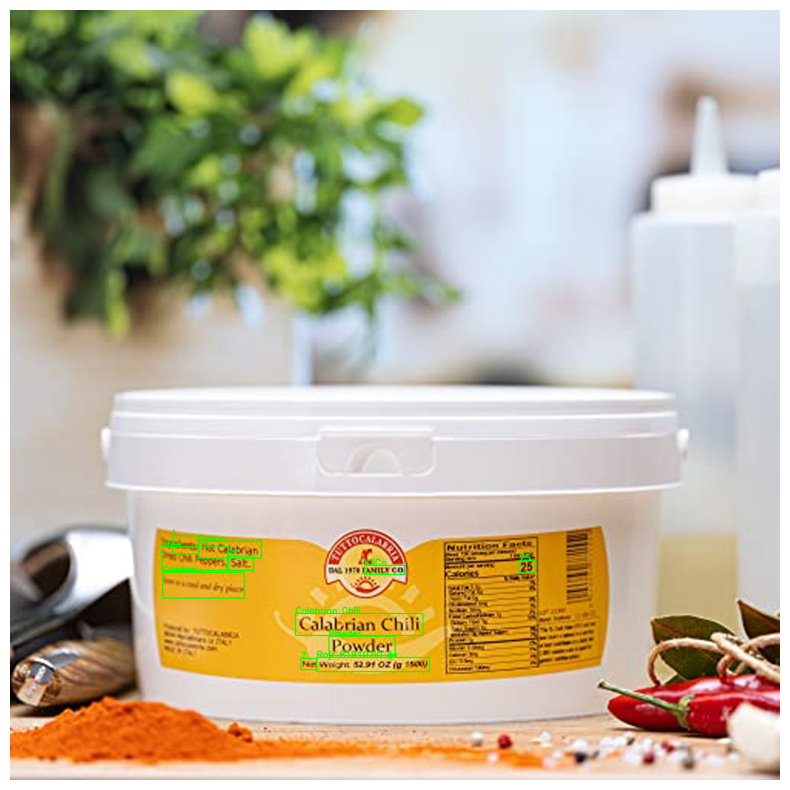

In [23]:
import easyocr
import matplotlib.pyplot as plt
import cv2

# Initialize the EasyOCR reader for English
reader = easyocr.Reader(['en'])

# Path to the image file
image_path = r"D:\Programs\DataScience\AmazonML\images\sample\test\21vv80MKQEL.jpg"
image_path = r"D:\Programs\DataScience\AmazonML\images\sample\41ADVPQgZOL.jpg"
image_path = r"D:\Programs\DataScience\AmazonML\images\sample\test\4.jpg"

# Perform OCR on the image
results = reader.readtext(image_path)

# Print the results
for (bbox, text, prob) in results:
    print(f"Detected text: {text} with confidence {prob}")

# Optional: Visualize the result using matplotlib
# Load the image using OpenCV
image = cv2.imread(image_path)

# Draw bounding boxes and text on the image
for (bbox, text, prob) in results:
    (top_left, top_right, bottom_right, bottom_left) = bbox
    top_left = tuple(map(int, top_left))
    bottom_right = tuple(map(int, bottom_right))
    cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)
    cv2.putText(image, text, top_left, cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 255, 0), 2)

# Convert the image to RGB (for displaying with matplotlib)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image with bounding boxes
plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)
plt.axis('off')  # Hide axis
plt.show()


## Finding Rotation Requied using tesseract

In [15]:
import pytesseract
from pytesseract import Output

pytesseract.tesseract_cmd = r"D:\Programs\TesseractOCR\tesseract.exe"
results = pytesseract.image_to_osd(image_path, output_type=Output.DICT, config='--psm 0 -c min_characters_to_try=5')
# display the orientation information
print("[INFO] detected orientation: {}".format(
	results["orientation"]))
print("[INFO] rotate by {} degrees to correct".format(
	results["rotate"]))
print("[INFO] detected script: {}".format(results["script"]))

[INFO] detected orientation: 0
[INFO] rotate by 0 degrees to correct
[INFO] detected script: Cyrillic


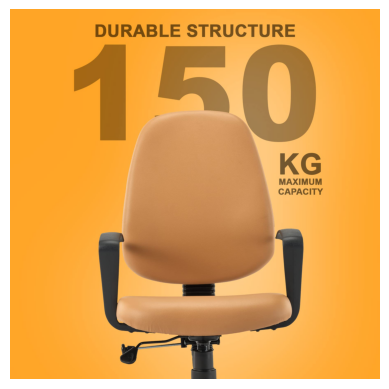

In [16]:
import cv2
import matplotlib.pyplot as plt

ROTATION_TO_CORRECT = 0

def rotate_image(image, angle):
    """
    Rotate the image by the given angle (0, 90, 180, 270 degrees).
    
    Parameters:
    - image: The input image (as a numpy array).
    - angle: The angle to rotate (0, 90, 180, 270 degrees).
    
    Returns:
    - The rotated image.
    """
    # Check if the angle is valid
    if angle not in [0, 90, 180, 270]:
        raise ValueError("Angle must be 0, 90, 180, or 270 degrees.")

    if angle == 0:
        return image
    elif angle == 90:
        return cv2.transpose(image)[::-1]
    elif angle == 180:
        return cv2.rotate(image, cv2.ROTATE_180)
    elif angle == 270:
        return cv2.transpose(image)[::-1].T

# Example usage:
# Load an image from file (adjust the path as needed)
image = cv2.imread(image_path)

# Rotate the image by 90 degrees
rotated_image = rotate_image(image, ROTATION_TO_CORRECT)

rotated_image_rgb = cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB)
# Display the rotated image (for testing purposes)
plt.imshow(rotated_image_rgb)
plt.axis('off')  # Hide axis
plt.show()


In [17]:
reader = easyocr.Reader(['en'])

# Perform OCR on the rotated image
results = reader.readtext(rotated_image)

# Print the results
for (bbox, text, prob) in results:
    print(f"Detected text: {text} with confidence {prob}")

Detected text: DURABLE STRUCTURE with confidence 0.7608354593394444
Detected text: 0 , with confidence 0.8051630854606628
Detected text: KG with confidence 0.9994112592998676
Detected text: MAXIMUM with confidence 0.9999501666938966
Detected text: CAPACITY with confidence 0.9999116164407983


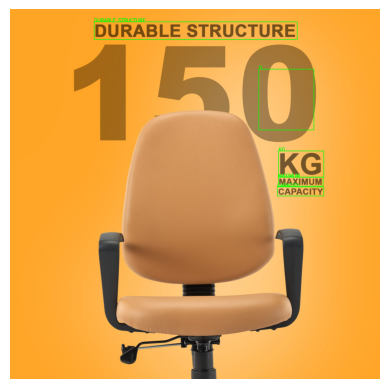

In [18]:
import numpy as np

image = np.ascontiguousarray(rotated_image, dtype=np.uint8)

for (bbox, text, prob) in results:
    (top_left, top_right, bottom_right, bottom_left) = bbox
    top_left = tuple(map(int, top_left))
    bottom_right = tuple(map(int, bottom_right))
    cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)
    cv2.putText(image, text, top_left, cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 255, 0), 2)

# Convert the image to RGB (for displaying with matplotlib)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image with bounding boxes
plt.imshow(image_rgb)
plt.axis('off')  # Hide axis
plt.show()


In [20]:
def preprocess_image(image):
    #image = cv2.imread(image_path)
    
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply adaptive thresholding to handle varying lighting conditions
    thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                  cv2.THRESH_BINARY_INV, 11, 2)
    
    # Remove noise with median blur
    denoised = cv2.medianBlur(thresh, 3)
    
    # Resize image if necessary
    height, width = denoised.shape
    if width > 1000:
        scaling_factor = 1000 / width
        new_size = (1000, int(height * scaling_factor))
        resized = cv2.resize(denoised, new_size, interpolation=cv2.INTER_LINEAR)
    else:
        resized = denoised
    
    return denoised
    

processed_image = preprocess_image(image) #rotated_image
results = reader.readtext(processed_image)

# Print the results
for (bbox, text, prob) in results:
    print(f"Detected text: {text} with confidence {prob}")
results


Detected text: DURABL with confidence 0.5841134733136583
Detected text: STRUCIRE with confidence 0.8551330486967605
Detected text: DURABLE STRUCTURE with confidence 0.9854671707918953
Detected text: MAxmUM with confidence 0.2685499311007898
Detected text: CAPACITY with confidence 0.9981186321393186


[([[np.int32(406), np.int32(42)],
   [np.int32(498), np.int32(42)],
   [np.int32(498), np.int32(66)],
   [np.int32(406), np.int32(66)]],
  'DURABL',
  np.float64(0.5841134733136583)),
 ([[np.int32(522), np.int32(40)],
   [np.int32(660), np.int32(40)],
   [np.int32(660), np.int32(66)],
   [np.int32(522), np.int32(66)]],
  'STRUCIRE',
  np.float64(0.8551330486967605)),
 ([[np.int32(407), np.int32(62)],
   [np.int32(1399), np.int32(62)],
   [np.int32(1399), np.int32(148)],
   [np.int32(407), np.int32(148)]],
  'DURABLE STRUCTURE',
  np.float64(0.9854671707918953)),
 ([[np.int32(1301), np.int32(818)],
   [np.int32(1523), np.int32(818)],
   [np.int32(1523), np.int32(866)],
   [np.int32(1301), np.int32(866)]],
  'MAxmUM',
  np.float64(0.2685499311007898)),
 ([[np.int32(1301), np.int32(867)],
   [np.int32(1525), np.int32(867)],
   [np.int32(1525), np.int32(909)],
   [np.int32(1301), np.int32(909)]],
  'CAPACITY',
  np.float64(0.9981186321393186))]

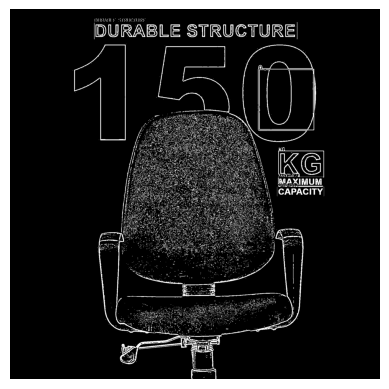

In [21]:
image = np.ascontiguousarray(processed_image, dtype=np.uint8)

for (bbox, text, prob) in results:
    (top_left, top_right, bottom_right, bottom_left) = bbox
    top_left = tuple(map(int, top_left))
    bottom_right = tuple(map(int, bottom_right))
    cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)
    cv2.putText(image, text, top_left, cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 255, 0), 2)

# Convert the image to RGB (for displaying with matplotlib)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image with bounding boxes
plt.imshow(image_rgb)
plt.axis('off')  # Hide axis
plt.show()


In [43]:
import cv2
import numpy as np
import easyocr
import matplotlib.pyplot as plt

# Initialize the OCR reader
reader = easyocr.Reader(['en'])

def preprocess_image(image):
    # Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply adaptive thresholding
    thresh_image = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
    
    # Apply morphological operations
    kernel = np.ones((3, 3), np.uint8)
    dilated_image = cv2.dilate(thresh_image, kernel, iterations=1)
    eroded_image = cv2.erode(dilated_image, kernel, iterations=1)
    
    # Sharpen the image
    sharpening_filter = np.array([[0, -1, 0],
                                  [-1, 5, -1],
                                  [0, -1, 0]])
    sharpened_image = cv2.filter2D(eroded_image, -1, sharpening_filter)
    
    return sharpened_image

def detect_text_regions(image):
    # Convert to grayscale and threshold
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    
    # Find contours
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Get bounding boxes for contours
    regions = []
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        regions.append((x, y, w, h))
    return regions

def highlight_text_regions(image, text_regions):
    highlighted_image = image.copy()
    for region in text_regions:
        x, y, w, h = region
        cv2.rectangle(highlighted_image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    return highlighted_image

def ocr_image(image):
    results = reader.readtext(image)
    return results

def display_results(image, results):
    # Draw bounding boxes and text
    for (bbox, text, prob) in results:
        (top_left, top_right, bottom_right, bottom_left) = bbox
        top_left = tuple(map(int, top_left))
        bottom_right = tuple(map(int, bottom_right))
        cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)
        cv2.putText(image, text, top_left, cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 255, 0), 2)
    
    # Convert image to RGB for matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Display image
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

def main(image_path):
    # Load image
    image = cv2.imread(image_path)
    
    # Preprocess image
    preprocessed_image = preprocess_image(image)
    
    # Detect text regions
    text_regions = detect_text_regions(preprocessed_image)
    
    # Highlight text regions
    highlighted_image = highlight_text_regions(image, text_regions)
    
    # OCR on the highlighted image
    results = ocr_image(highlighted_image)
    
    # Display results
    display_results(highlighted_image, results)

# Path to your image file
image_path = 'D:\\Programs\\DataScience\\AmazonML\\images\\sample\\test\\21vv80MKQEL.jpg'
main(image_path)


error: OpenCV(4.10.0) d:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0x46dff480::Set<1,-1,-1>,struct cv::impl::A0x46dff480::Set<0,2,5>,4>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


In [21]:
print(rotated_image.shape)  # Should be (height, width, channels)
print(rotated_image.dtype)  # Should be uint8


(121, 500, 3)
uint8


In [22]:
print(image.shape)  # Should be (height, width, channels)
print(image.dtype)  # Should be uint8

(500, 121, 3)
uint8


In [40]:
image_path

'D:\\Programs\\DataScience\\AmazonML\\images\\sample\\test\\21vv80MKQEL.jpg'

In [2]:
from mmocr.apis import MMOCRInferencer

ModuleNotFoundError: No module named 'mmocr'